# 1. Importar librerias 

In [37]:
import numpy as np 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics

import seaborn as sns

# 2. Cargar Dataset

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
df = pd.read_csv('../../../data/StudentsPerformance.csv')
df

,STUDENT ID,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,Accommodation type in Cyprus,Mother’s education,Father’s education,Number of sisters/brothers,Parental status,Mother’s occupation,Father’s occupation,Weekly study hours,Reading frequency,Reading frequency.1,Attendance to the seminars/conferences related to the department,Impact of your projects/activities on your success,Attendance to classes,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,1,1,2,3,1,2,5,3,2,2,1,1,1,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,1,2,3,2,1,2,1,2,2,2,1,1,1,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,2,2,2,2,1,2,1,2,1,2,1,1,1,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,2,1,2,5,1,2,1,3,1,2,1,1,1,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,4,3,3,2,1,2,4,2,1,1,1,1,1,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,2,1,2,2,2,2,4,3,3,2,1,1,1,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,2,1,1,5,1,2,1,3,2,2,2,1,2,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,1,3,4,4,1,2,4,2,2,2,1,1,1,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,3,4,4,1,1,3,3,2,2,1,1,1,1,2,1,2,1,2,1,5,3,9,4


# 3. Exploracion de los datos

In [6]:
df.head(10)

,STUDENT ID,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,Accommodation type in Cyprus,Mother’s education,Father’s education,Number of sisters/brothers,Parental status,Mother’s occupation,Father’s occupation,Weekly study hours,Reading frequency,Reading frequency.1,Attendance to the seminars/conferences related to the department,Impact of your projects/activities on your success,Attendance to classes,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,1,1,2,3,1,2,5,3,2,2,1,1,1,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,1,2,3,2,1,2,1,2,2,2,1,1,1,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,2,2,2,2,1,2,1,2,1,2,1,1,1,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,2,1,2,5,1,2,1,3,1,2,1,1,1,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,4,3,3,2,1,2,4,2,1,1,1,1,1,2,1,2,2,2,1,2,2,1,1
5,STUDENT6,2,2,2,3,2,2,2,2,1,1,3,3,2,1,2,3,1,1,2,1,1,1,1,1,1,2,1,2,4,4,1,2
6,STUDENT7,1,2,2,4,2,2,2,1,1,3,1,3,1,1,2,4,2,2,2,2,1,2,1,1,3,3,3,3,4,4,1,5
7,STUDENT8,1,1,2,3,1,1,1,2,2,3,4,3,1,1,4,3,1,2,2,1,1,1,3,1,3,2,2,1,1,1,1,2
8,STUDENT9,2,1,3,3,2,1,1,1,1,3,2,4,2,1,2,4,1,2,2,1,1,1,1,1,3,2,2,2,4,3,1,5
9,STUDENT10,2,1,2,3,2,2,1,3,4,2,1,2,3,1,2,3,2,2,2,1,1,2,1,1,2,2,2,2,1,2,1,0


In [7]:
df.describe()

,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,Accommodation type in Cyprus,Mother’s education,Father’s education,Number of sisters/brothers,Parental status,Mother’s occupation,Father’s occupation,Weekly study hours,Reading frequency,Reading frequency.1,Attendance to the seminars/conferences related to the department,Impact of your projects/activities on your success,Attendance to classes,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,1.620690,1.600000,1.944828,3.572414,1.662069,1.600000,1.579310,1.627586,1.620690,1.731034,2.282759,2.634483,2.806897,1.172414,2.358621,2.806897,2.200000,1.944828,2.013793,1.213793,1.206897,1.241379,1.337931,1.165517,2.544828,2.055172,2.393103,1.806897,3.124138,2.724138,4.131034,3.227586
std,0.613154,0.491596,0.537216,0.805750,0.474644,0.491596,0.495381,1.020245,1.061112,0.783999,1.223062,1.147544,1.360640,0.490816,0.805156,1.329664,0.917424,0.562476,0.539884,0.411404,0.588035,0.429403,0.614870,0.408483,0.564940,0.674736,0.604343,0.810492,1.301083,0.916536,3.260145,2.197678
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000
75%,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,4.000000,1.000000,2.000000,4.000000,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,7.000000,5.000000
max,3.000000,2.000000,3.000000,5.000000,2.000000,2.000000,2.000000,5.000000,4.000000,4.000000,6.000000,6.000000,5.000000,3.000000,5.000000,5.000000,5.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,4.000000,9.000000,7.000000


In [8]:
with open('null_counts.txt', 'w')as f:
        f.write(df.isnull().sum().to_string())

# 4. Procesamiento de datos

In [9]:
df

,STUDENT ID,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,Accommodation type in Cyprus,Mother’s education,Father’s education,Number of sisters/brothers,Parental status,Mother’s occupation,Father’s occupation,Weekly study hours,Reading frequency,Reading frequency.1,Attendance to the seminars/conferences related to the department,Impact of your projects/activities on your success,Attendance to classes,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,1,1,2,3,1,2,5,3,2,2,1,1,1,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,1,2,3,2,1,2,1,2,2,2,1,1,1,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,2,2,2,2,1,2,1,2,1,2,1,1,1,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,2,1,2,5,1,2,1,3,1,2,1,1,1,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,4,3,3,2,1,2,4,2,1,1,1,1,1,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,2,1,2,2,2,2,4,3,3,2,1,1,1,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,2,1,1,5,1,2,1,3,2,2,2,1,2,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,1,3,4,4,1,2,4,2,2,2,1,1,1,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,3,4,4,1,1,3,3,2,2,1,1,1,1,2,1,2,1,2,1,5,3,9,4


In [10]:
df = df.drop(['STUDENT ID'], axis=1)

In [11]:
df = df.drop(['COURSE ID'], axis=1)

In [12]:
df

,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,Accommodation type in Cyprus,Mother’s education,Father’s education,Number of sisters/brothers,Parental status,Mother’s occupation,Father’s occupation,Weekly study hours,Reading frequency,Reading frequency.1,Attendance to the seminars/conferences related to the department,Impact of your projects/activities on your success,Attendance to classes,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),GRADE
0,2,2,3,3,1,2,2,1,1,1,1,2,3,1,2,5,3,2,2,1,1,1,1,1,3,2,1,2,1,1,1
1,2,2,3,3,1,2,2,1,1,1,2,3,2,1,2,1,2,2,2,1,1,1,1,1,3,2,3,2,2,3,1
2,2,2,2,3,2,2,2,2,4,2,2,2,2,1,2,1,2,1,2,1,1,1,1,1,2,2,1,1,2,2,1
3,1,1,1,3,1,2,1,2,1,2,1,2,5,1,2,1,3,1,2,1,1,1,1,2,3,2,2,1,3,2,1
4,2,2,1,3,2,2,1,3,1,4,3,3,2,1,2,4,2,1,1,1,1,1,2,1,2,2,2,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2,1,2,3,1,1,2,1,1,2,1,2,2,2,2,4,3,3,2,1,1,1,1,1,2,1,2,1,3,3,5
141,1,1,2,4,2,2,2,1,4,2,1,1,5,1,2,1,3,2,2,2,1,2,1,1,3,2,2,1,5,3,5
142,1,1,1,4,2,2,2,1,1,1,3,4,4,1,2,4,2,2,2,1,1,1,1,1,3,3,2,1,4,3,1
143,2,1,2,4,1,1,1,5,2,3,4,4,1,1,3,3,2,2,1,1,1,1,2,1,2,1,2,1,5,3,4


In [13]:
le = LabelEncoder()
df['GRADE'] = le.fit_transform(df['GRADE'])

In [14]:
df

,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,Accommodation type in Cyprus,Mother’s education,Father’s education,Number of sisters/brothers,Parental status,Mother’s occupation,Father’s occupation,Weekly study hours,Reading frequency,Reading frequency.1,Attendance to the seminars/conferences related to the department,Impact of your projects/activities on your success,Attendance to classes,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),GRADE
0,2,2,3,3,1,2,2,1,1,1,1,2,3,1,2,5,3,2,2,1,1,1,1,1,3,2,1,2,1,1,1
1,2,2,3,3,1,2,2,1,1,1,2,3,2,1,2,1,2,2,2,1,1,1,1,1,3,2,3,2,2,3,1
2,2,2,2,3,2,2,2,2,4,2,2,2,2,1,2,1,2,1,2,1,1,1,1,1,2,2,1,1,2,2,1
3,1,1,1,3,1,2,1,2,1,2,1,2,5,1,2,1,3,1,2,1,1,1,1,2,3,2,2,1,3,2,1
4,2,2,1,3,2,2,1,3,1,4,3,3,2,1,2,4,2,1,1,1,1,1,2,1,2,2,2,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2,1,2,3,1,1,2,1,1,2,1,2,2,2,2,4,3,3,2,1,1,1,1,1,2,1,2,1,3,3,5
141,1,1,2,4,2,2,2,1,4,2,1,1,5,1,2,1,3,2,2,2,1,2,1,1,3,2,2,1,5,3,5
142,1,1,1,4,2,2,2,1,1,1,3,4,4,1,2,4,2,2,2,1,1,1,1,1,3,3,2,1,4,3,1
143,2,1,2,4,1,1,1,5,2,3,4,4,1,1,3,3,2,2,1,1,1,1,2,1,2,1,2,1,5,3,4


<Axes: >

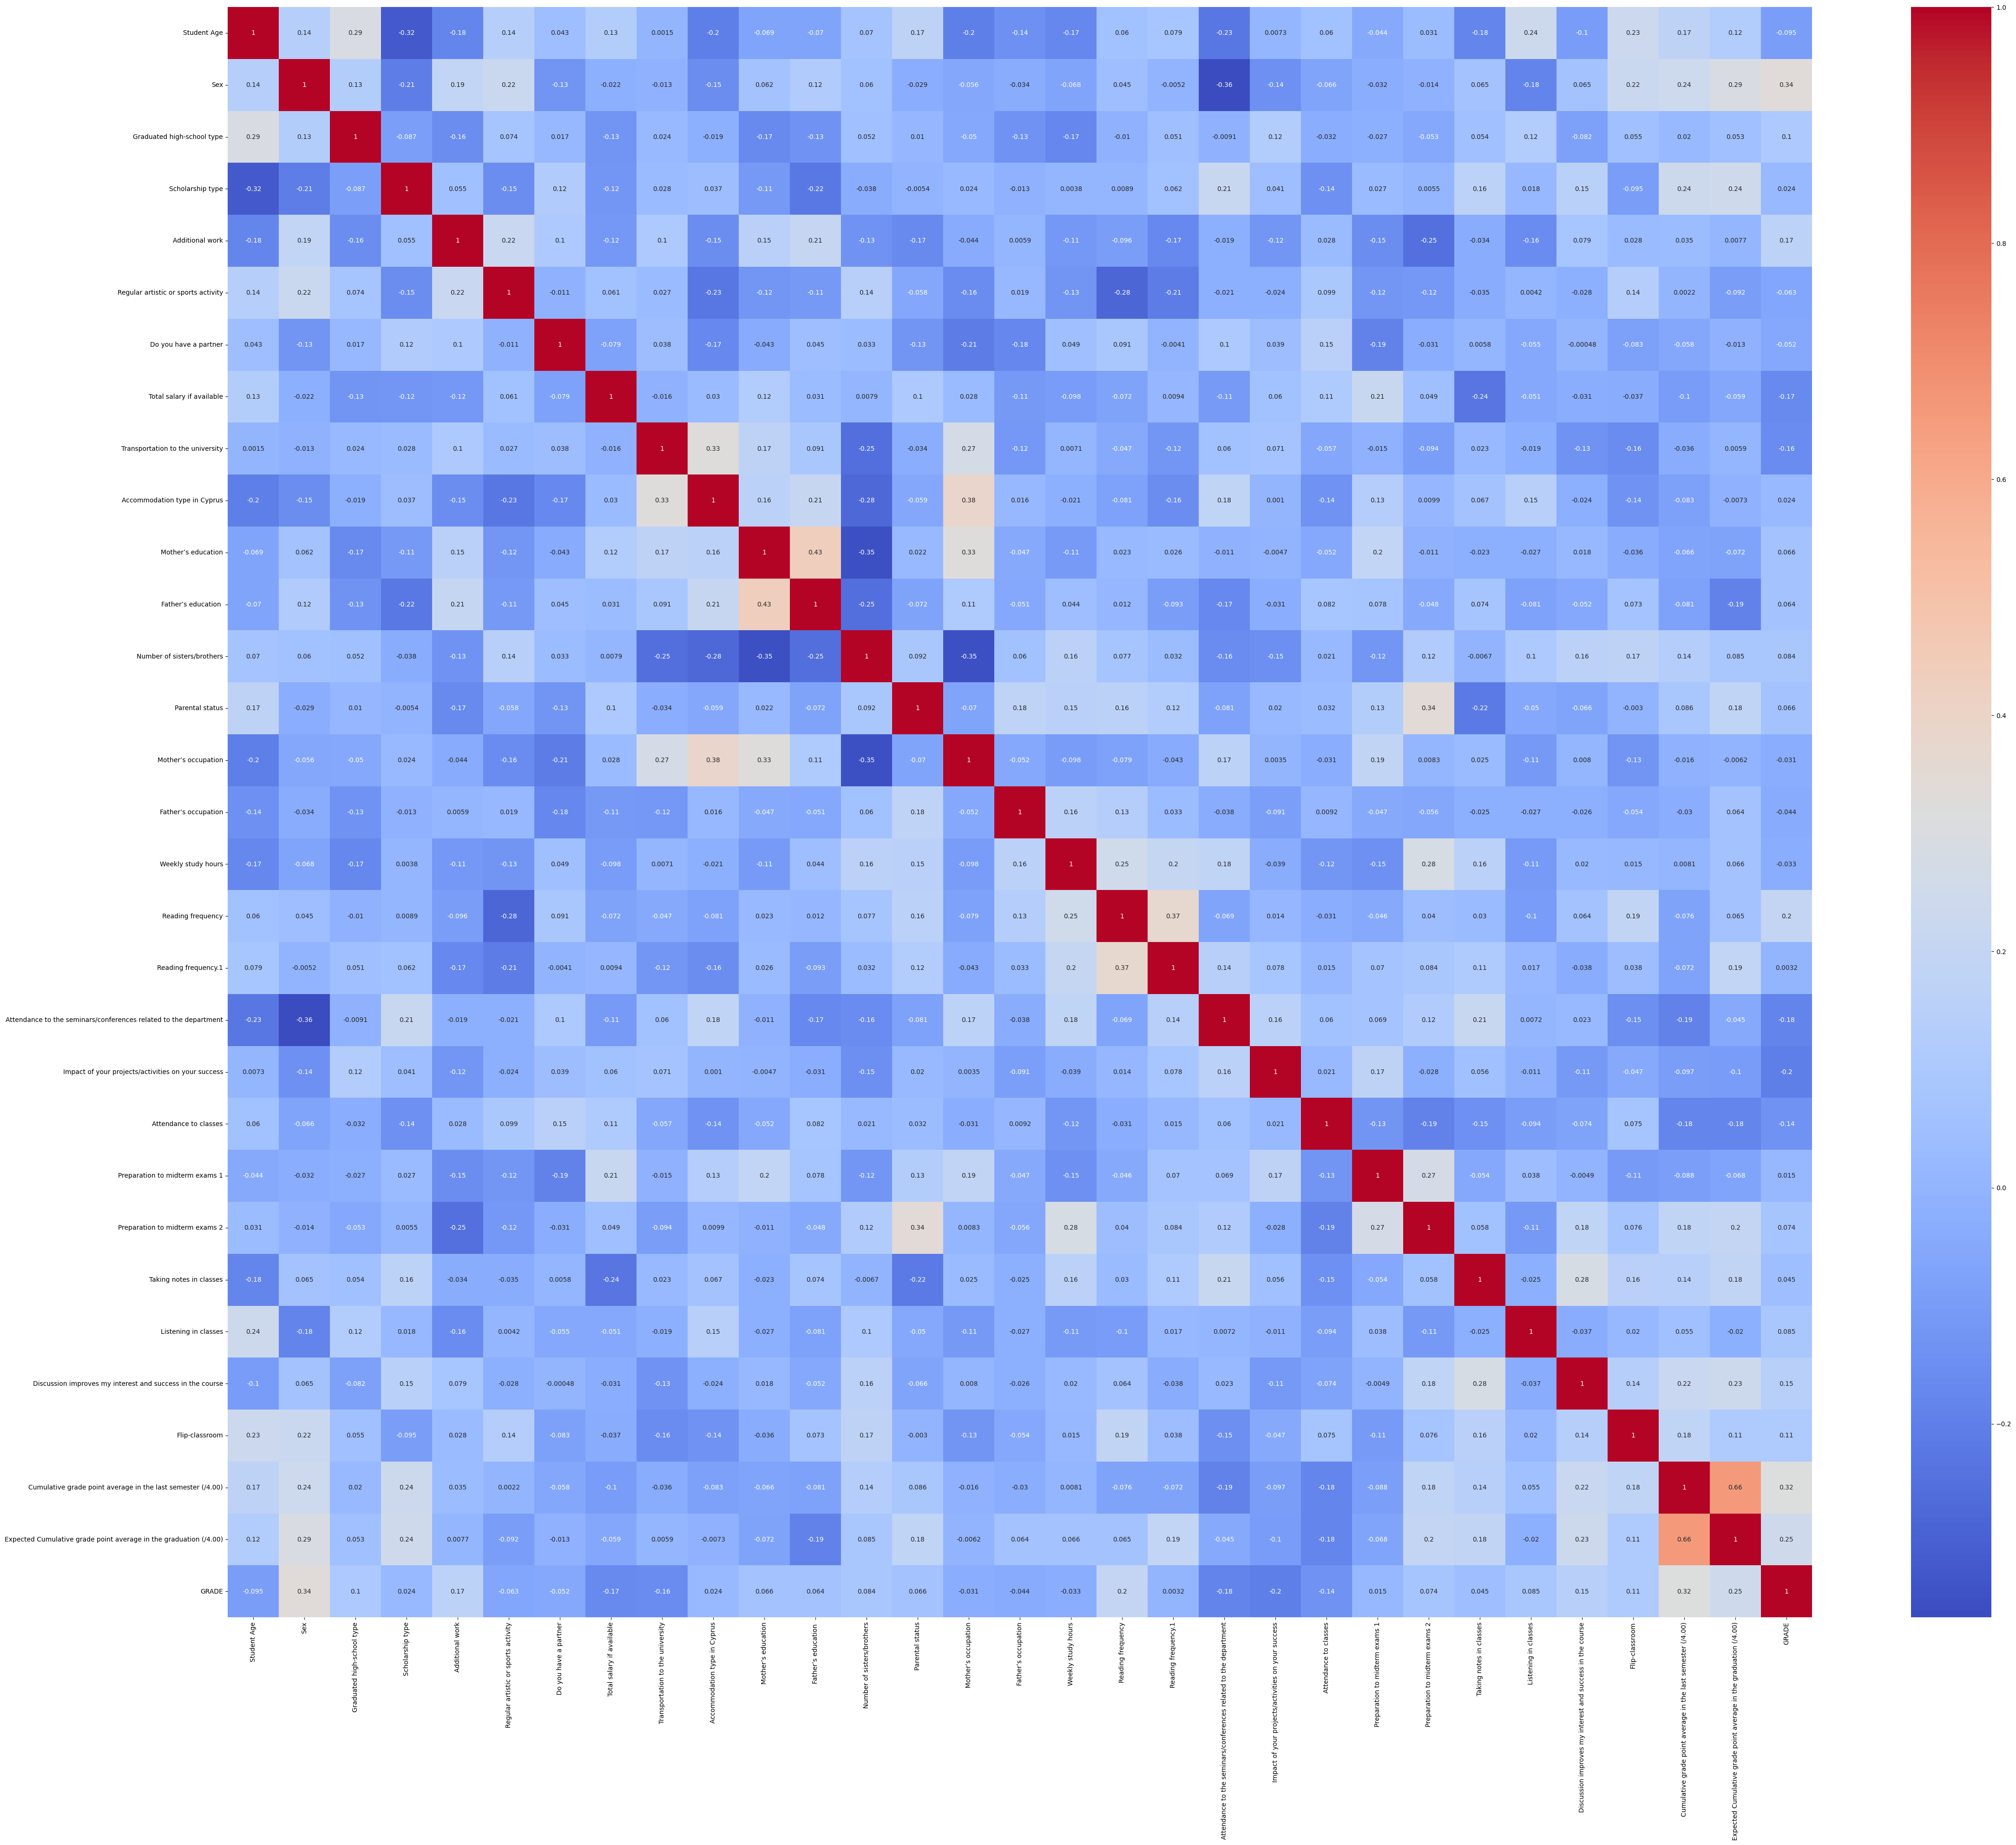

In [15]:
plt.figure(figsize=(55,45))
sns.heatmap(df.corr(), annot= True, cmap='coolwarm')

# 5. Seleccionar las variables X y Y

In [16]:
x = df.drop(['GRADE'],axis= 1)
x

,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,Accommodation type in Cyprus,Mother’s education,Father’s education,Number of sisters/brothers,Parental status,Mother’s occupation,Father’s occupation,Weekly study hours,Reading frequency,Reading frequency.1,Attendance to the seminars/conferences related to the department,Impact of your projects/activities on your success,Attendance to classes,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00)
0,2,2,3,3,1,2,2,1,1,1,1,2,3,1,2,5,3,2,2,1,1,1,1,1,3,2,1,2,1,1
1,2,2,3,3,1,2,2,1,1,1,2,3,2,1,2,1,2,2,2,1,1,1,1,1,3,2,3,2,2,3
2,2,2,2,3,2,2,2,2,4,2,2,2,2,1,2,1,2,1,2,1,1,1,1,1,2,2,1,1,2,2
3,1,1,1,3,1,2,1,2,1,2,1,2,5,1,2,1,3,1,2,1,1,1,1,2,3,2,2,1,3,2
4,2,2,1,3,2,2,1,3,1,4,3,3,2,1,2,4,2,1,1,1,1,1,2,1,2,2,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2,1,2,3,1,1,2,1,1,2,1,2,2,2,2,4,3,3,2,1,1,1,1,1,2,1,2,1,3,3
141,1,1,2,4,2,2,2,1,4,2,1,1,5,1,2,1,3,2,2,2,1,2,1,1,3,2,2,1,5,3
142,1,1,1,4,2,2,2,1,1,1,3,4,4,1,2,4,2,2,2,1,1,1,1,1,3,3,2,1,4,3
143,2,1,2,4,1,1,1,5,2,3,4,4,1,1,3,3,2,2,1,1,1,1,2,1,2,1,2,1,5,3


In [17]:
y = df['GRADE']
y

0      1
1      1
2      1
3      1
4      1
      ..
140    5
141    5
142    1
143    4
144    3
Name: GRADE, Length: 145, dtype: int64

# 6. Dividir los datos en entrenamiento y testing

In [19]:
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.20,shuffle=True,random_state=42)

In [20]:
x_train

,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,Accommodation type in Cyprus,Mother’s education,Father’s education,Number of sisters/brothers,Parental status,Mother’s occupation,Father’s occupation,Weekly study hours,Reading frequency,Reading frequency.1,Attendance to the seminars/conferences related to the department,Impact of your projects/activities on your success,Attendance to classes,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00)
9,2,1,2,3,2,2,1,3,4,2,1,2,3,1,2,3,2,2,2,1,1,2,1,1,2,2,2,2,1,2
4,2,2,1,3,2,2,1,3,1,4,3,3,2,1,2,4,2,1,1,1,1,1,2,1,2,2,2,1,2,2
26,2,2,2,3,2,1,1,1,1,1,4,4,4,1,2,4,2,3,2,1,1,1,1,1,3,3,3,2,2,1
120,2,1,1,3,1,1,1,2,2,3,3,3,2,1,3,4,1,1,1,1,1,2,2,1,3,3,3,2,2,2
125,1,1,2,5,1,1,2,1,1,3,1,1,5,1,2,3,3,2,3,2,1,1,1,2,3,2,3,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,1,3,4,2,2,2,1,1,3,1,3,5,1,2,4,2,2,1,1,1,1,1,1,2,3,3,3,2,2
106,1,2,2,4,2,1,2,1,1,2,2,2,1,1,2,1,3,2,2,1,1,1,3,2,2,2,2,1,4,4
14,3,2,2,4,1,1,2,3,4,2,3,1,2,1,4,1,2,2,2,1,1,1,1,1,2,3,2,1,4,4
92,1,2,2,3,2,2,2,1,1,1,3,4,4,1,3,2,3,2,2,1,1,1,1,1,3,2,3,3,2,2


In [23]:
x_test

,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,Accommodation type in Cyprus,Mother’s education,Father’s education,Number of sisters/brothers,Parental status,Mother’s occupation,Father’s occupation,Weekly study hours,Reading frequency,Reading frequency.1,Attendance to the seminars/conferences related to the department,Impact of your projects/activities on your success,Attendance to classes,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00)
69,2,1,2,4,2,2,1,1,1,1,2,2,2,1,2,3,1,1,2,1,1,1,2,1,3,2,3,1,3,2
140,2,1,2,3,1,1,2,1,1,2,1,2,2,2,2,4,3,3,2,1,1,1,1,1,2,1,2,1,3,3
27,1,2,1,3,1,2,2,1,1,1,1,1,4,1,2,3,3,2,2,1,1,2,1,1,3,1,2,1,2,1
19,1,2,1,3,2,2,1,2,2,2,3,3,3,1,2,4,4,2,2,1,2,1,1,1,3,2,2,3,2,3
42,2,2,2,3,2,1,2,1,4,2,4,4,2,1,3,1,2,2,1,1,1,1,1,1,2,1,3,1,2,3
117,3,1,1,3,2,1,2,1,1,2,4,4,1,1,1,3,2,2,3,2,1,2,1,1,2,3,2,1,2,3
126,1,1,1,4,1,1,1,3,2,3,4,6,2,1,4,3,4,2,3,1,1,1,2,1,3,3,3,1,2,2
108,2,1,1,5,2,1,2,2,2,1,1,2,1,3,1,5,3,3,2,1,1,2,1,1,2,3,1,2,3,3
84,3,2,3,3,1,2,1,3,1,2,4,2,5,3,2,1,1,2,2,1,1,1,3,3,3,3,3,3,5,4
18,1,1,2,4,2,2,2,3,1,1,2,2,5,1,2,5,5,3,2,2,1,2,1,1,3,1,3,3,3,3


In [24]:
y_train

9      0
4      1
26     1
120    1
125    2
      ..
71     6
106    7
14     2
92     7
102    7
Name: GRADE, Length: 116, dtype: int64

In [25]:
y_test

69     5
140    5
27     1
19     3
42     1
117    1
126    3
108    6
84     7
18     2
12     0
55     3
128    0
78     4
73     6
36     2
112    2
133    3
100    6
101    7
94     6
136    0
11     0
66     5
31     3
45     3
51     4
76     4
111    2
Name: GRADE, dtype: int64

# 7. Escalamiento -> Opcional

# 8. Seleccionar el modelo y entranarlo

In [26]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [27]:
model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

# 9. Hacer predicciones

In [32]:
features = [[
    1,#Student Age (1: 18-21, 2: 22-25, 3: above 26)
    2,#Sex (1: female, 2: male)
    2,#Graduated high-school type: (1: private, 2: state, 3: other)
    4,#Scholarship type: (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)
    1,#Additional work: (1: Yes, 2: No)
    1,#Regular artistic or sports activity: (1: Yes, 2: No)
    1,#Do you have a partner: (1: Yes, 2: No)
    2,#Total salary if available (1: USD 135-200, 2: USD 201-270, 3: USD 271-340, 4: USD 341-410, 5: above 410)
    2,#Transportation to the university: (1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other)
    2,#Accommodation type in Cyprus: (1: rental, 2: dormitory, 3: with family, 4: Other)
    4,#Mothers’ education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
    5,#Fathers’ education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
    2,#Number of sisters/brothers (if available): (1: 1, 2: 2, 3: 3, 4: 4, 5: 5 or above)
    1,#Parental status: (1: married, 2: divorced, 3: died - one of them or both)
    2,#Mothers’ occupation: (1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employment, 6: other)
    3,#Fathers’ occupation: (1: retired, 2: government officer, 3: private sector employee, 4: self-employment, 5: other)
    3,#Weekly study hours: (1: None, 2: <5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours)
    2,#Reading frequency (non-scientific books/journals): (1: None, 2: Sometimes, 3: Often)
    1,#Reading frequency (scientific books/journals): (1: None, 2: Sometimes, 3: Often)
    1,#Attendance to the seminars/conferences related to the department: (1: Yes, 2: No)
    1,#Impact of your projects/activities on your success: (1: positive, 2: negative, 3: neutral)
    2,#Attendance to classes (1: always, 2: sometimes, 3: never)
    2,#Preparation to midterm exams 1: (1: alone, 2: with friends, 3: not applicable)
    2,#Preparation to midterm exams 2: (1: closest date to the exam, 2: regularly during the semester, 3: never)
    2,#Taking notes in classes: (1: never, 2: sometimes, 3: always)
    3,#Listening in classes: (1: never, 2: sometimes, 3: always)
    2,#Discussion improves my interest and success in the course: (1: never, 2: sometimes, 3: always)
    3,#Flip-classroom: (1: not useful, 2: useful, 3: not applicable)
    4,#Cumulative grade point average in the last semester (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
    4,#Expected Cumulative grade point average in the graduation (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
]]

In [33]:
prediccion = model.predict(features)

/Users/memopispo/Documents/NumpyPandas/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [31]:
y_prediccion = model.predict(x_test)

In [34]:
prediccion

array([4.46])

In [35]:
y_prediccion

array([2.69, 3.04, 2.25, 3.1 , 3.75, 2.17, 3.  , 3.05, 3.7 , 3.97, 3.78,
       3.38, 2.41, 1.71, 3.6 , 4.09, 3.82, 3.08, 5.53, 1.98, 4.26, 2.05,
       4.16, 3.81, 3.59, 3.02, 3.74, 4.53, 2.82])

# 10. Evaluacion del modelo

In [38]:
metrics.mean_absolute_error(y_test,y_prediccion)

1.7193103448275864

In [39]:
import pickle
with open ('modelo_regresion.pkl', 'wb') as file:
    pickle.dump(model, file)